### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**:Luyi HUANG

**Student ID**:20651788

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [3]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd

In [4]:
#Loading the Dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(40)  # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
#Information on features
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000




---



> Q0. Generate Y - Predictor Value

In [6]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response

data['Y'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']
print(data['Y'])
save_data_y = data['Y']

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      3
16      0
17      0
18      1
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      1
30      0
31      0
32      1
33      1
34      0
35      0
36      0
37      0
38      0
39      2
40      0
41      0
42      0
43      0
44      0
45      0
46      1
47      0
48      0
49      0
50      0
51      0
52      0
53      3
54      0
55      2
56      1
57      0
58      0
59      0
60      3
61      0
62      0
63      0
64      0
65      1
66      0
67      3
68      0
69      0
70      0
71      0
72      0
73      1
74      0
75      0
76      1
77      2
78      0
79      2
80      0
81      0
82      0
83      0
84      0
85      0
86      1
87      3
88      1
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      1
97      0
98      1
99      0


#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

In [7]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

In [8]:
#the existence of missing value
num_rows = data.shape[0]
data_description = data.describe()
data_description.iloc[0,:]!=num_rows
# #as can be seen from below, only income has missing value

ID                     False
Year_Birth             False
Income                  True
Kidhome                False
Teenhome               False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
Y                      False
Name: count, dtype: bool

In [9]:
#the exitence of outliers

#step 1: find out the upper and lower thredshold of each datas

summary = data.describe()
q1 = summary.loc['25%']
q3 = summary.loc['75%']
iqr = q3 - q1
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
#step 2: use a dictionary to record the number of outliers for each varialble
dictionary_outliers = {}
for col in summary.columns:
        outliers = data[(data[col] < lower_threshold[col]) | (data[col] > upper_threshold[col])]
        num_outliers = outliers.shape[0]
        dictionary_outliers[col] = num_outliers
print(dictionary_outliers)



{'ID': 0, 'Year_Birth': 3, 'Income': 8, 'Kidhome': 0, 'Teenhome': 0, 'Recency': 0, 'MntWines': 35, 'MntFruits': 227, 'MntMeatProducts': 175, 'MntFishProducts': 223, 'MntSweetProducts': 248, 'MntGoldProds': 207, 'NumDealsPurchases': 86, 'NumWebPurchases': 4, 'NumCatalogPurchases': 23, 'NumStorePurchases': 0, 'NumWebVisitsMonth': 8, 'AcceptedCmp3': 163, 'AcceptedCmp4': 167, 'AcceptedCmp5': 163, 'AcceptedCmp1': 144, 'AcceptedCmp2': 30, 'Complain': 21, 'Z_CostContact': 0, 'Z_Revenue': 0, 'Response': 334, 'Y': 97}


In [10]:
#the existence of imbalances
#use a dictionary to record the value count of ordinal/nominal data
dictionary_imbalance = {}
for col in ['Education','Marital_Status','Y','Kidhome','Teenhome']:
    target_count = data[col].value_counts()
    dictionary_imbalance[col] = target_count
dictionary_imbalance

{'Education': Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: Education, dtype: int64,
 'Marital_Status': Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: Marital_Status, dtype: int64,
 'Y': 0    1631
 1     370
 2     142
 3      51
 4      36
 5      10
 Name: Y, dtype: int64,
 'Kidhome': 0    1293
 1     899
 2      48
 Name: Kidhome, dtype: int64,
 'Teenhome': 0    1158
 1    1030
 2      52
 Name: Teenhome, dtype: int64}

>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

In [11]:
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT
# handling outliers(specifically for income)
data['Income'] = data['Income'].fillna(data['Income'].mean())
# handling the outliers
for col in summary.columns:
    data[col] = data[col].clip(lower=lower_threshold[col], upper=upper_threshold[col])




> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Clipping | Reduce the impact of outliers/preserve the structure of data |
|Handling Missing Values| Fill N/A with Mean | Avoid missing data/avoid bias|


>  Q1d. Plot 3 or more types of charts over all columns of data

In [12]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting
import matplotlib.pyplot as plt
# data = pd.read_csv("marketing_campaign.csv", sep="\t")


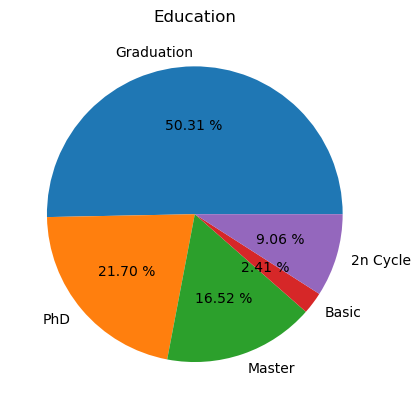

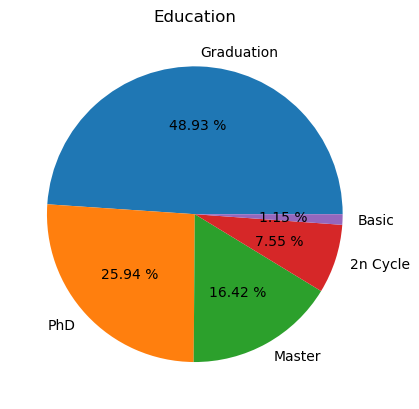

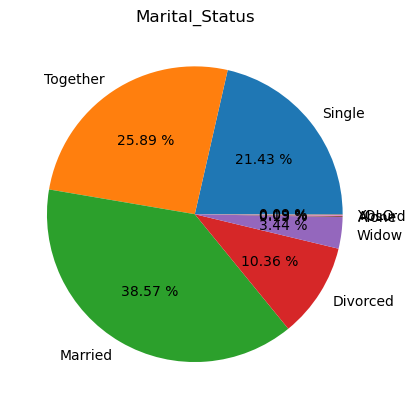

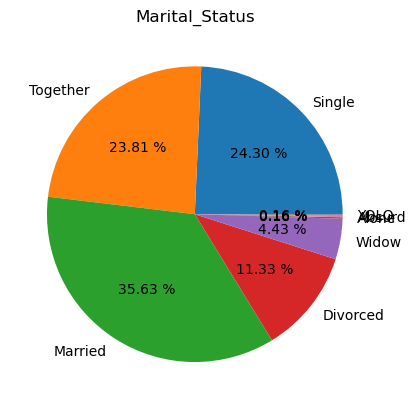

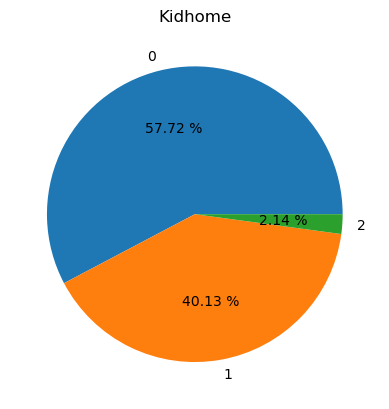

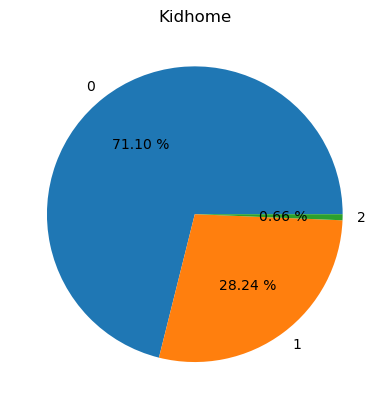

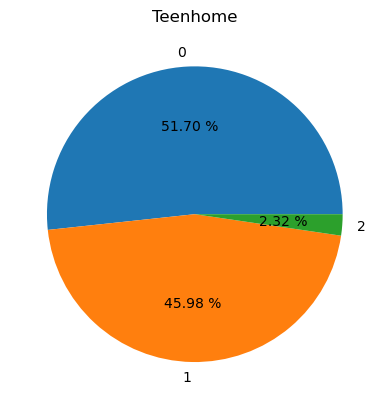

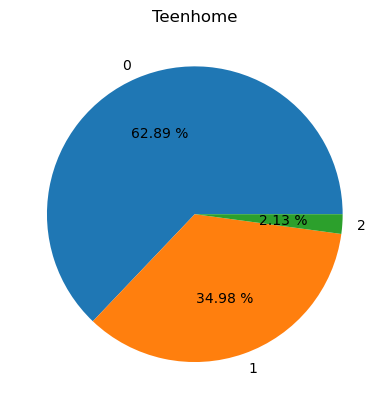

In [37]:
#pie chart distribution within the whole dataset in comparison to those who accepted the offer from the campaign
# figME, axsME = plt.subplots(nrows=8, ncols=1, figsize=(12, 18))
# i = 0
# figME.suptitle('pie_chart')
import collections
_data = data.loc[data['Y']>0]
for col in ['Education','Marital_Status','Kidhome','Teenhome']:
    pie_chart = data[col].tolist()
    pie_chart = collections.Counter(pie_chart)
    label = []
    count = []
    for item in pie_chart.items():
        label.append(item[0])
        count.append(item[1])
    plt.pie(count,labels=label,autopct='%.2f %%')
    plt.title(col)
    plt.show()
    pie_chart = _data[col].tolist()
    pie_chart = collections.Counter(pie_chart)
    label = []
    count = []
    for item in pie_chart.items():
        label.append(item[0])
        count.append(item[1])
    plt.pie(count,labels=label,autopct='%.2f %%')
    plt.title(col)
    plt.show()


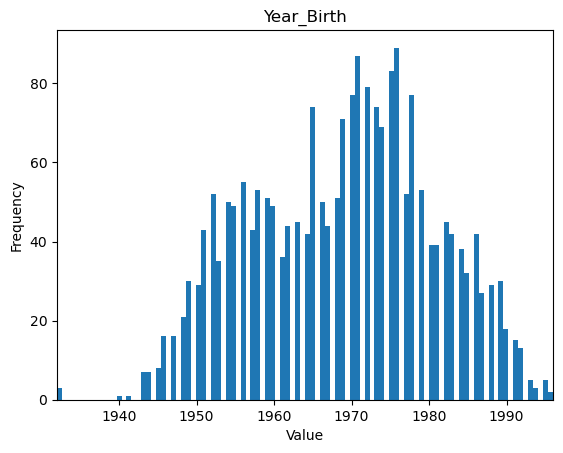

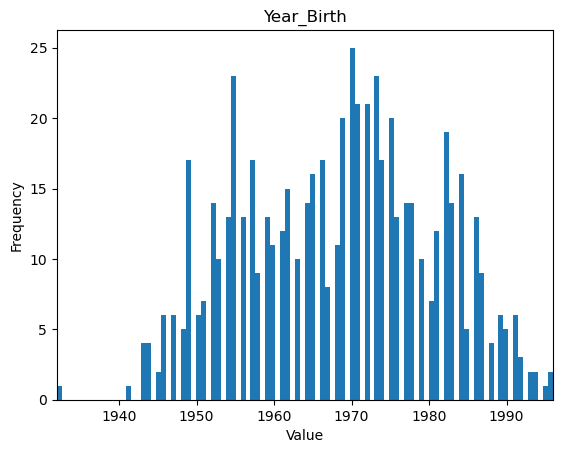

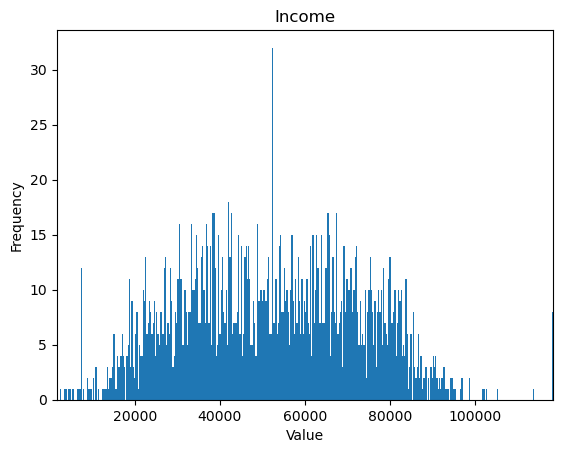

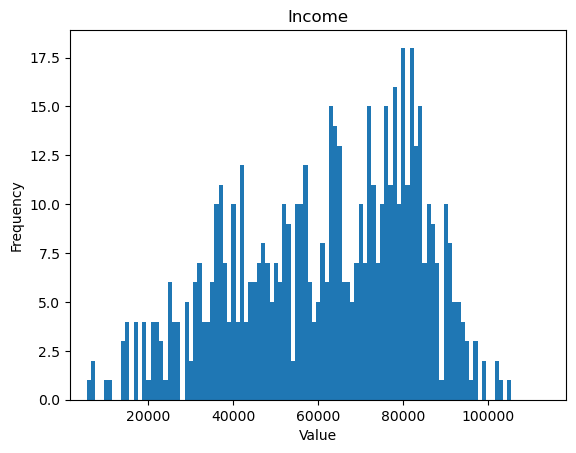

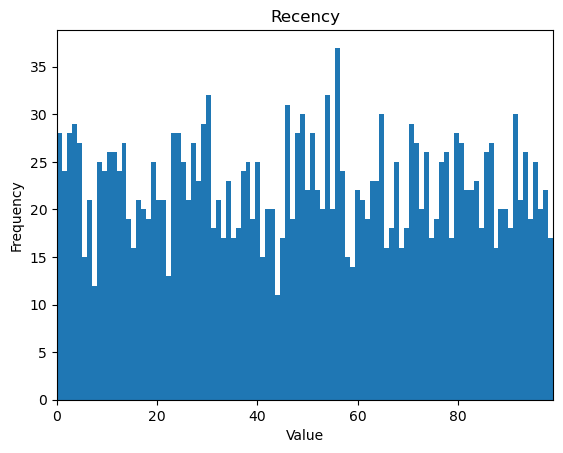

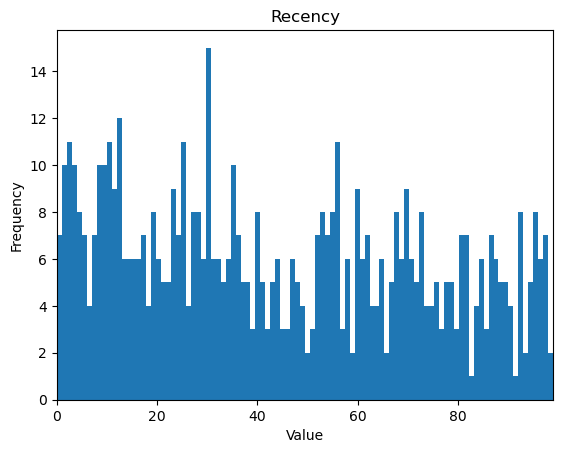

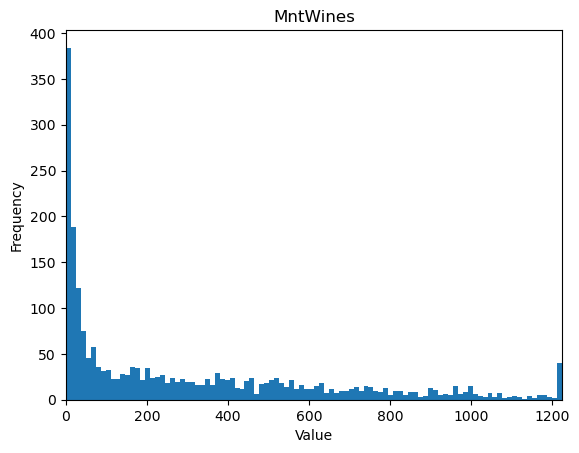

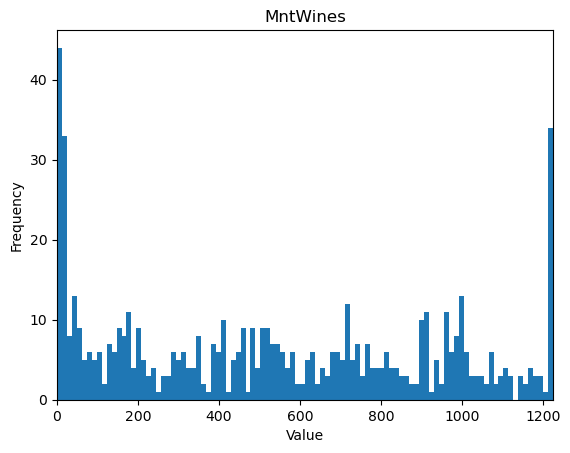

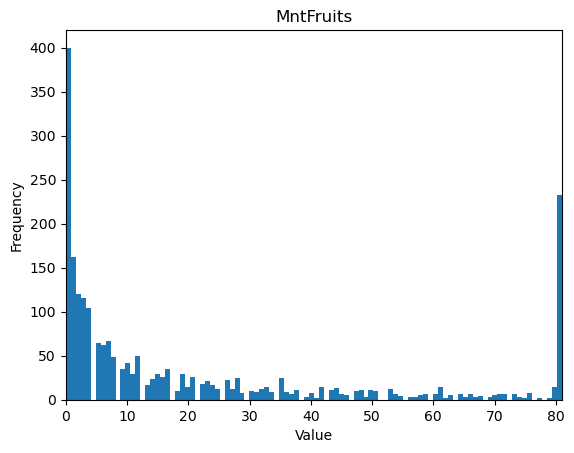

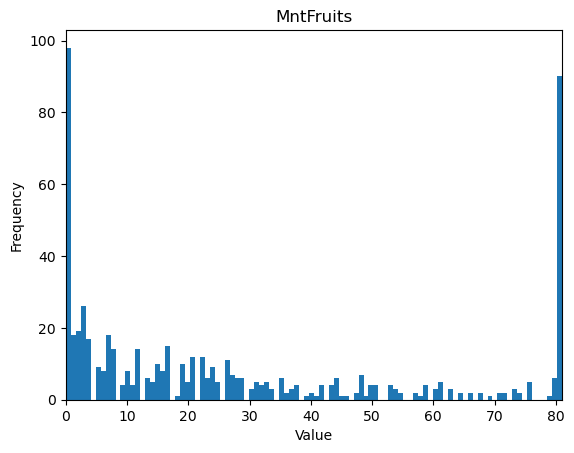

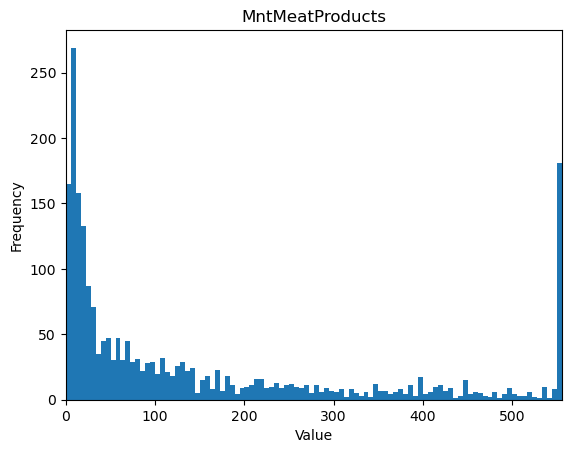

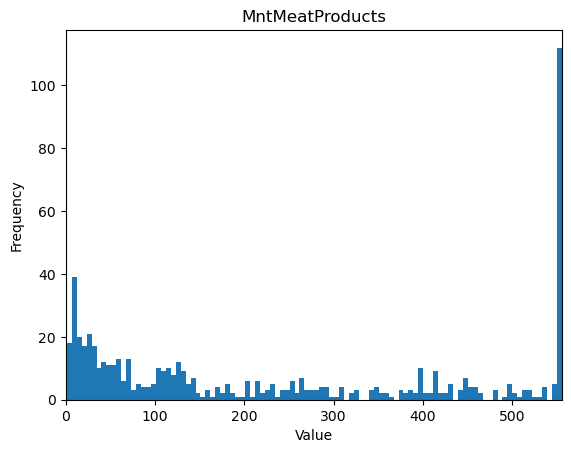

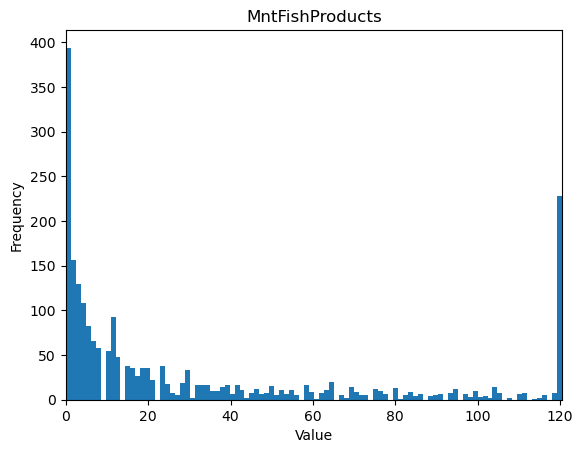

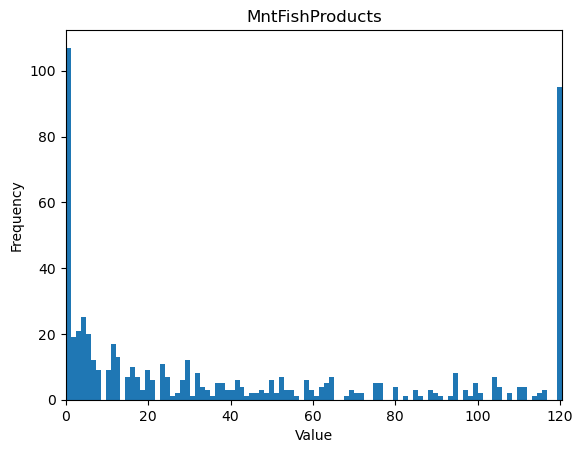

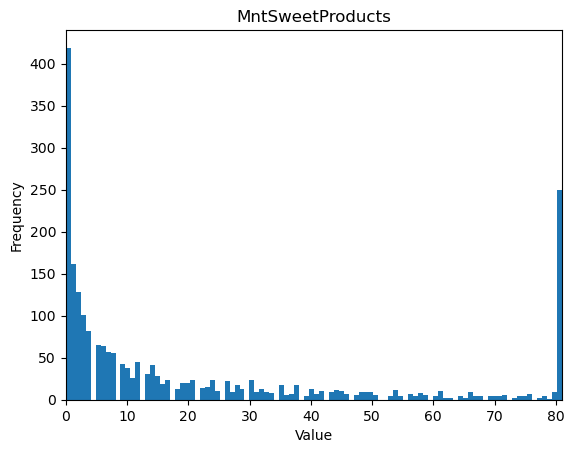

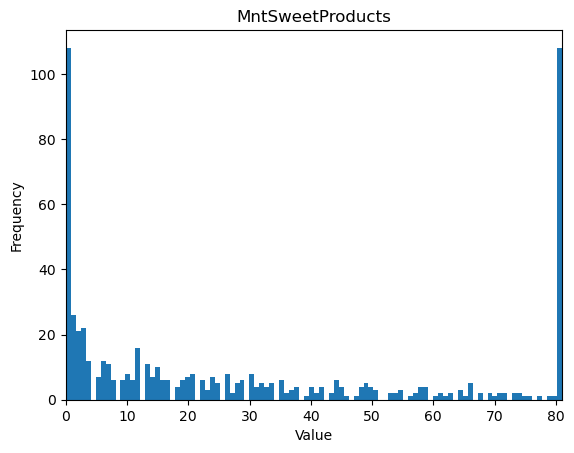

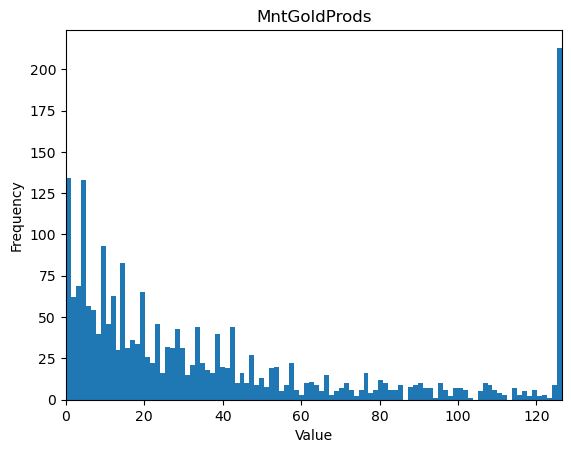

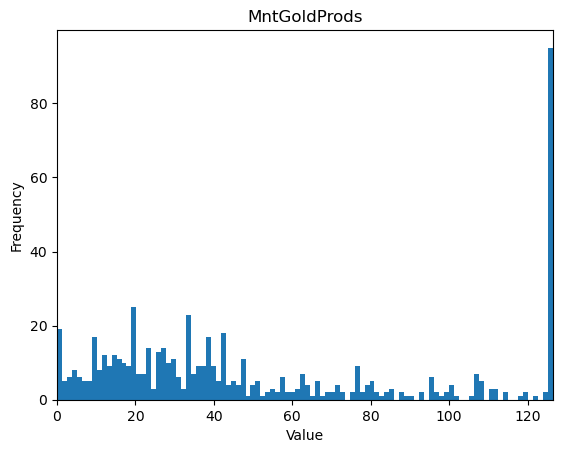

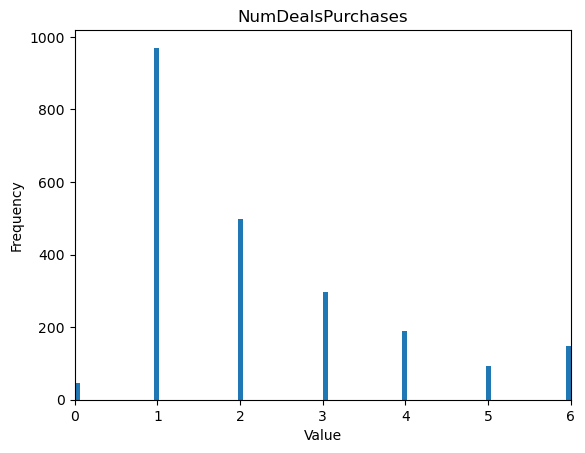

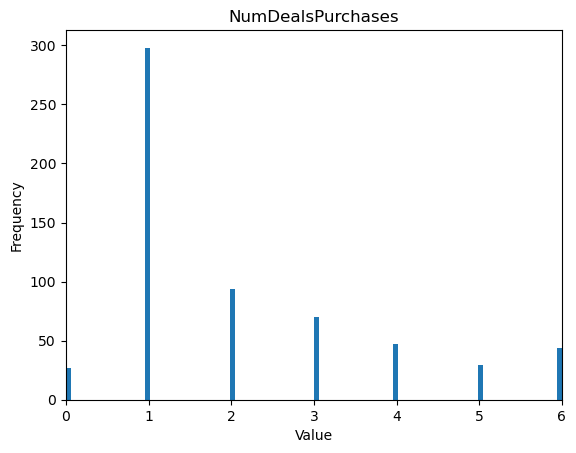

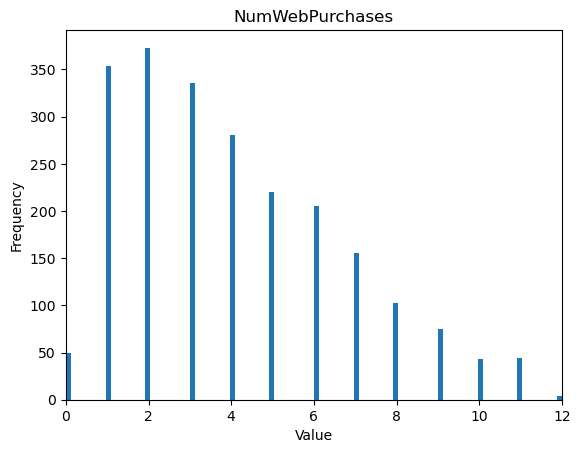

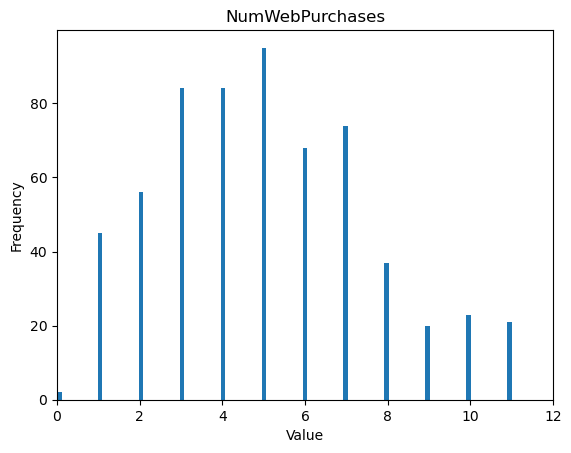

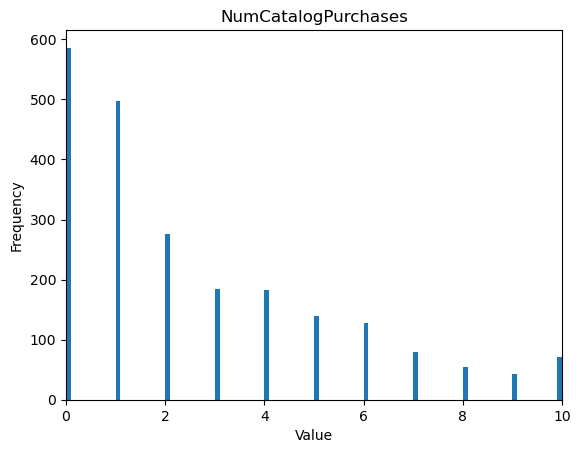

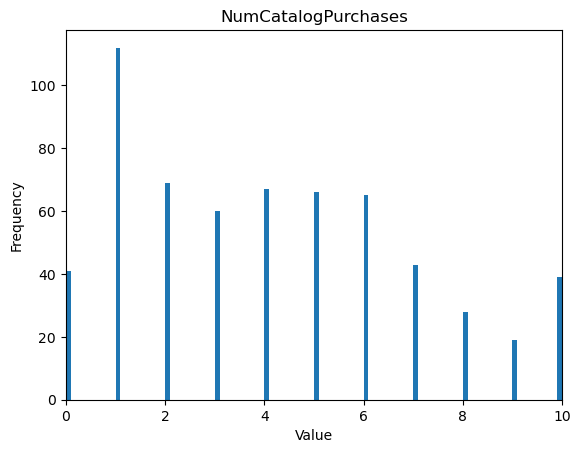

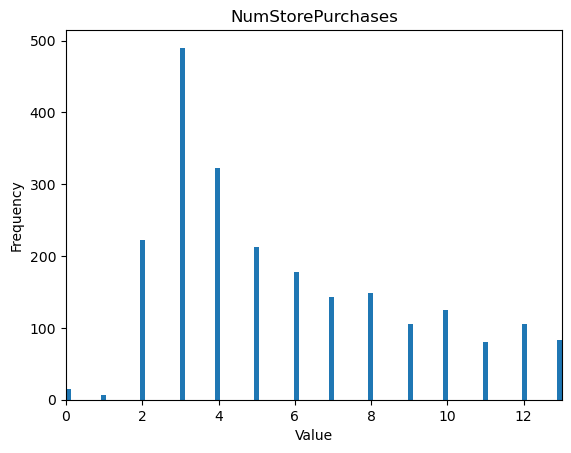

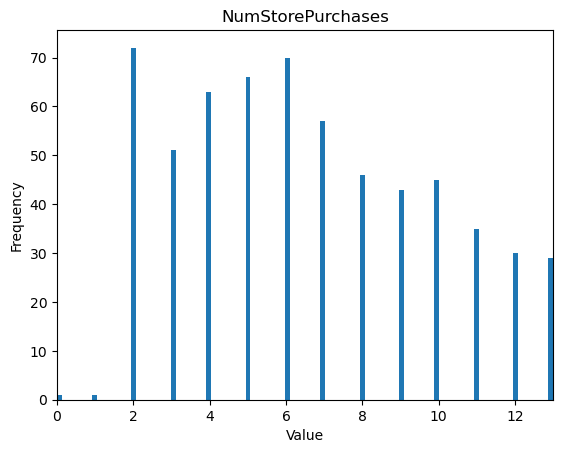

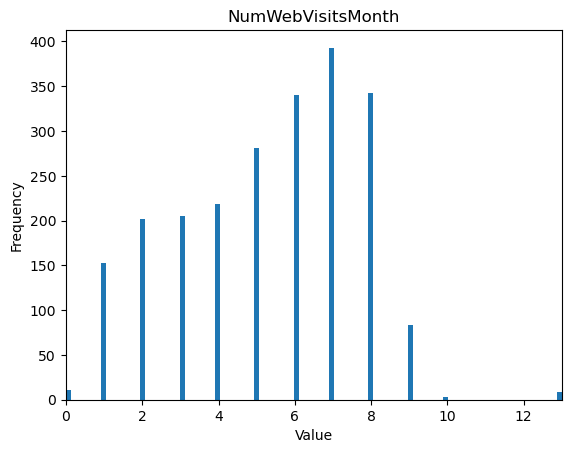

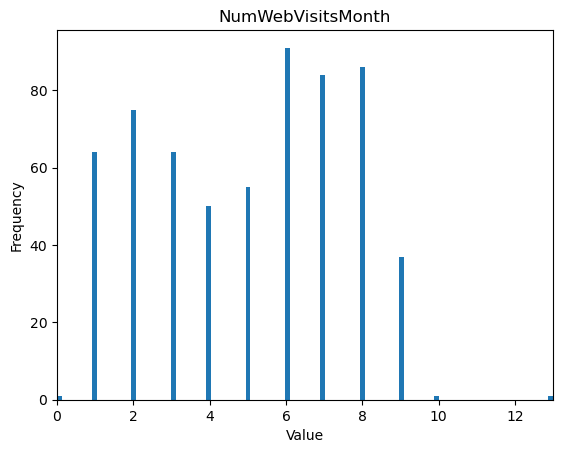

In [14]:
#histogram(with or without accepting the offer)
for col in ['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']:
    histogram = data[col].tolist()
    num = 100
    if col == 'Income':
        num = 400
    plt.hist(histogram, bins=num)
    plt.xlim(min(histogram), max(histogram))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(col+)
    plt.show()
    _histogram = _data[col].tolist()
    plt.hist(_histogram, bins=100)
    plt.xlim(min(histogram), max(histogram))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(col)
    plt.show()
    

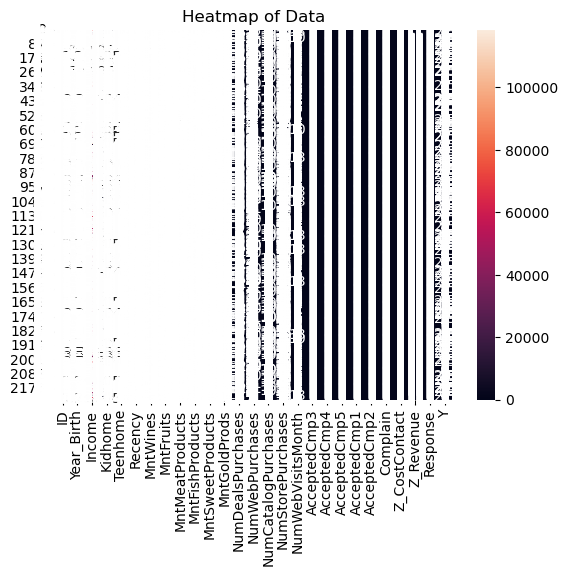

In [15]:
import seaborn as sns

_data = data.drop(['Dt_Customer', 'Education','Marital_Status'], axis=1)
# create a heatmap using the data
sns.heatmap(_data, annot=True)

# add title
plt.title('Heatmap of Data')

# display the plot
plt.show()

> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | (Fill in the blank) | (Fill in the blank) |
| Pattern 2 | (Fill in the blank) | (Fill in the blank) |
| Pattern 3 | (Fill in the blank) | (Fill in the blank) |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | discrete| N/A |
Year_Birth         | discrete | outlier&normalization |      
Education          | ordinal | data balancing&rank replacement |       
Marital_Status     | nominal | data balancing&one hot encoding |
Income             | continuous | missing data&normailzation&outlier |      
Kidhome            | continuous | data balancing&normalization |        
Teenhome           | continuous | data balancing&normalization |   
Dt_Customer        | continuous | normalization&outliers |      
Recency            | continuous | normalization&outliers |     
MntWines           | continuous | normalization&outliers |    
MntFruits          | continuous | normalization&outliers |    
MntMeatProducts    | continuous | normalization&outliers |     
MntFishProducts    | continuous | normalization&outliers |    
MntSweetProducts   | continuous | normalization&outliers |    
MntGoldProds       | continuous | normalization&outliers |
NumDealsPurchases  | discrete | normalization&outliers |  
NumWebPurchases    | discrete | normalization&outliers |
NumCatalogPurchases| discrete | normalization&outliers |
NumStorePurchases  | discrete | normalization&outliers |  
NumWebVisitsMonth  | discrete | normalization&outliers |  
AcceptedCmp3       | discrete | normalization |  
AcceptedCmp4       | discrete | normalization |       
AcceptedCmp5       | discrete | normalization |       
AcceptedCmp1       | discrete | normalization |       
AcceptedCmp2       | discrete | normalization |       
Complain           | discrete | normalization |       
Z_CostContact      | constant | normalization |     
Z_Revenue          | constant | normalization |          
Response           | discrete | normalization |


>  Q2b. Perform the aforementioned Data Preprocessings

In [16]:
#@title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing
# already dealt with missing data and outliers
# one hot encoder for marital status
from sklearn.preprocessing import StandardScaler
_data = pd.get_dummies(data['Marital_Status']).astype(int)
_data = pd.concat([data, _data], axis=1)
_data = _data.drop('Marital_Status',axis=1)
# rank replacement for education
ranked_data = _data['Education'].rank(method='average')
_data['Education'] = ranked_data
ranked_data = _data['Dt_Customer'].rank(method='average')
_data['Dt_Customer'] = ranked_data
# do normalization to all data
from sklearn.preprocessing import MinMaxScaler


# Create scaler object
scaler = MinMaxScaler()
nor_col = _data.columns
_X = _data.drop('Y',axis=1)
_y = save_data_y
# print(_X)
print(_y)

# Apply normalization to dataframe
data_norm = pd.DataFrame(scaler.fit_transform(_data), columns=_data.columns)



# import xxx as xxx (Import panda Libraries)
# from sklearn.preprocessing import xxx (Import sklearn libraries)
# ....
#

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      3
16      0
17      0
18      1
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      1
30      0
31      0
32      1
33      1
34      0
35      0
36      0
37      0
38      0
39      2
40      0
41      0
42      0
43      0
44      0
45      0
46      1
47      0
48      0
49      0
50      0
51      0
52      0
53      3
54      0
55      2
56      1
57      0
58      0
59      0
60      3
61      0
62      0
63      0
64      0
65      1
66      0
67      3
68      0
69      0
70      0
71      0
72      0
73      1
74      0
75      0
76      1
77      2
78      0
79      2
80      0
81      0
82      0
83      0
84      0
85      0
86      1
87      3
88      1
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      1
97      0
98      1
99      0




---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

>  Q3a. Generate Test/Training Data Split

In [17]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split

from sklearn.model_selection import train_test_split # Import Train Test Split From Libraries
X = data_norm.drop(['Y'], axis=1)
y = save_data_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y_train)


            ID  Year_Birth  Education    Income  Kidhome  Teenhome  \
792   0.310875    0.281250   0.379319  0.129334      0.0       0.0   
1271  0.669109    0.484375   0.774202  0.535592      0.0       0.5   
1538  0.096417    0.609375   1.000000  0.602287      0.0       0.5   
668   0.983558    0.562500   1.000000  0.235439      0.5       0.0   
1975  0.921365    0.578125   0.379319  0.023135      0.0       0.5   
729   0.991958    0.921875   0.379319  0.755965      0.0       0.0   
1651  0.750156    0.453125   0.379319  0.688421      0.0       0.0   
2054  0.570280    0.328125   0.379319  0.403565      0.5       0.5   
926   0.179430    0.718750   0.379319  0.650426      0.0       0.0   
1023  0.406577    0.531250   0.774202  0.272971      0.0       0.5   
178   0.937539    0.421875   0.379319  0.313453      1.0       0.5   
485   0.216781    0.500000   1.000000  0.661076      0.0       0.0   
1948  0.700742    0.562500   0.379319  0.294417      0.5       0.5   
2164  0.679117    0.

> Q3b. Choose and deploy dataset to 3+ ML Model

In [18]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Step 1. Import Model

# Step 2. Fit Dataframe into Model

# Step 3. Generate Model Prediction (Y)



---



In [19]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()



The code below uses different models to predict the values

In [20]:
#use linear regression
from sklearn.linear_model import LinearRegression, Ridge,Lasso,LogisticRegression
#create the model
lr = LogisticRegression()
#model fitting
lr.fit(X_train,y_train)
#prediction
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)


[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 2 0 3 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0]


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#use support vector machine
from sklearn.svm import SVC
svc_sigmoid = SVC(kernel = 'sigmoid')
svc_poly = SVC(kernel = 'poly')
svc_sigmoid.fit(X_train,y_train)
svc_poly.fit(X_train,y_train)
y_pred_svc = svc_sigmoid.predict(X_test)
y_pred_poly = svc_poly.predict(X_test)



In [22]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(y_pred_mnb)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [23]:
#k nearest neighbors
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)


[0 1 0 4 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 2 3 2 0 0 3 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 2 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0]


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

linear regression
Accuracy:  0.6897321428571429
Precision:  0.8770040314427258
Recall:  0.6897321428571429
F1:  0.7668514064934452


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


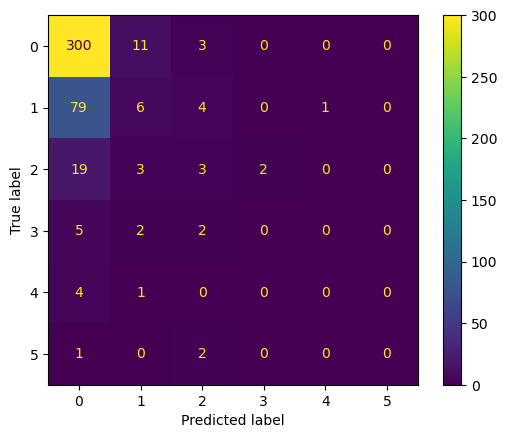

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k nearest neighbor
Accuracy:  0.6875
Precision:  0.8313123462406901
Recall:  0.6875
F1:  0.7461387856861138


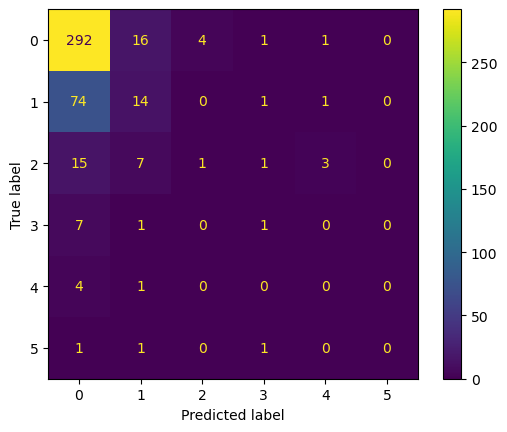

multinomial NB
Accuracy:  0.6986607142857143
Precision:  0.9731065488828229
Recall:  0.6986607142857143
F1:  0.8108470582030838


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


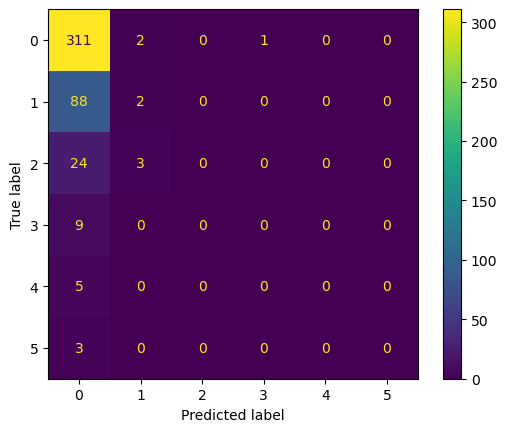

svc sigmoid
Accuracy:  0.6450892857142857
Precision:  0.7814595233882656
Recall:  0.6450892857142857
F1:  0.7033114508628425


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


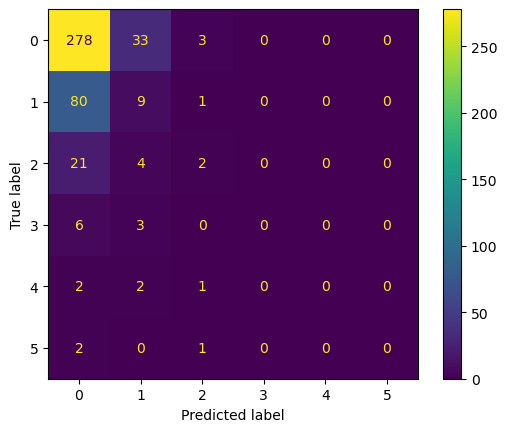

svc_poly
Accuracy:  0.6964285714285714
Precision:  0.864126267987733
Recall:  0.6964285714285714
F1:  0.7655433061382446


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


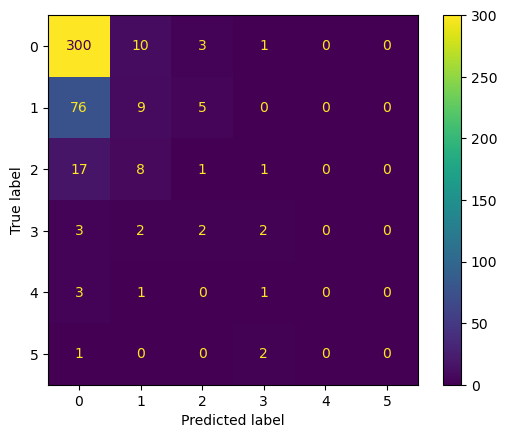

In [24]:
#@title Q4a. Evaluate the Model's Accuracy
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score ...
# print(xxxx)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import sklearn.metrics
models = [lr, knn, mnb, svc_sigmoid, svc_poly]
dictionary = {lr:"linear regression",knn:"k nearest neighbor",mnb:"multinomial NB", svc_sigmoid:"svc sigmoid", svc_poly:"svc_poly"}
for model in models:
    tmp_y_test = model.predict(X_test)
    print(dictionary[model])
    print("Accuracy: ", accuracy_score(tmp_y_test,y_test))
    print("Precision: ", precision_score(tmp_y_test,y_test,average='weighted'))
    print("Recall: ", recall_score(tmp_y_test,y_test,average='weighted'))
    print("F1: ", f1_score(tmp_y_test,y_test,average='weighted'))
    #confusion matrix\
    confusion_matrix = metrics.confusion_matrix(y_test,tmp_y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[0,1,2,3,4,5])
    cm_display.plot()
    plt.show()

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

I would choose Multinomial Naive Baysian model, as while all models have very similar accuracy, recall, this model have the highest f1 and precision score



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [25]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score


#MNB model has two major hyperparameters: alpha and fit prior
alphas = [0.1,0.5, 1.0,5.0,10.0,50.0,100.0]
fit_priors = [True, False]
for alpha in alphas:
    for fit_prior in fit_priors:
        mnb = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
        mnb.fit(X_train,y_train)
        y_pred = mnb.predict(X_test)
        print("Alpha: ", alpha)
        print("Fit prior: ", fit_prior)
        print("Accuracy: ", accuracy_score(y_pred,y_test))
        print("Precision: ", precision_score(y_pred,y_test,average='weighted',zero_division=1))
        print("Recall: ", recall_score(y_pred,y_test,average='weighted',zero_division=1))
        print("F1: ", f1_score(y_pred,y_test,average='weighted',zero_division=1))
        
        
        


Alpha:  0.1
Fit prior:  True
Accuracy:  0.6964285714285714
Precision:  0.9728833345971085
Recall:  0.6964285714285714
F1:  0.8104376907121916
Alpha:  0.1
Fit prior:  False
Accuracy:  0.46875
Precision:  0.402793996225525
Recall:  0.46875
F1:  0.41152753422956756
Alpha:  0.5
Fit prior:  True
Accuracy:  0.6986607142857143
Precision:  0.9730569457082197
Recall:  0.6986607142857143
F1:  0.8107607640204623
Alpha:  0.5
Fit prior:  False
Accuracy:  0.4888392857142857
Precision:  0.4327967028106359
Recall:  0.4888392857142857
F1:  0.4336945606640374
Alpha:  1.0
Fit prior:  True
Accuracy:  0.6986607142857143
Precision:  0.9731065488828229
Recall:  0.6986607142857143
F1:  0.8108470582030838
Alpha:  1.0
Fit prior:  False
Accuracy:  0.4888392857142857
Precision:  0.42862687670609645
Recall:  0.4888392857142857
F1:  0.4355809694421063
Alpha:  5.0
Fit prior:  True
Accuracy:  0.6986607142857143
Precision:  0.9870512018501669
Recall:  0.6986607142857143
F1:  0.8167730323673522
Alpha:  5.0
Fit prior:  

>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [26]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
# from sklearn.model_selection import cross_val_score

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
#use k-fold validation
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = X.to_numpy()
y = y.to_numpy()
for alpha in alphas:
    for fit_prior in fit_priors:
        accuracy_scores = []
        recall_scores = []
        precision_scores = []
        f1_scores = []
        for train_index, test_index in kf.split(X):
            # Split the data into training and test sets for this fold
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Train a logistic regression model on the training data
            model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
            model.fit(X_train, y_train)   
            y_pred = model.predict(X_test)
            accuracy_scores.append(accuracy_score(y_pred,y_test))
            precision_scores.append(precision_score(y_pred,y_test,average='weighted',zero_division=1))
            recall_scores.append(recall_score(y_pred,y_test,average='weighted',zero_division=1))
            f1_scores.append(f1_score(y_pred,y_test,average='weighted',zero_division=1))
        accuracy_sc = sum(accuracy_scores)/5
        recall_sc = sum(recall_scores)/5
        precision_sc = sum(precision_scores)/5
        f1_sc = sum(f1_scores)/5
        print("Alpha: ", alpha)
        print("Fit prior: ", fit_prior)
        print("Accuracy: ", accuracy_sc)
        print("Precision: ", precision_sc)
        print("Recall: ", recall_sc)
        print("F1: ", f1_sc)



Alpha:  0.1
Fit prior:  True
Accuracy:  0.7285714285714286
Precision:  0.9774021346145719
Recall:  0.7285714285714286
F1:  0.8329739471744675
Alpha:  0.1
Fit prior:  False
Accuracy:  0.50625
Precision:  0.44829545800116755
Recall:  0.50625
F1:  0.45385480603288775
Alpha:  0.5
Fit prior:  True
Accuracy:  0.7290178571428572
Precision:  0.9783550620179071
Recall:  0.7290178571428572
F1:  0.8334139220620088
Alpha:  0.5
Fit prior:  False
Accuracy:  0.5160714285714285
Precision:  0.47809672342345627
Recall:  0.5160714285714285
F1:  0.46767836608978647
Alpha:  1.0
Fit prior:  True
Accuracy:  0.7285714285714284
Precision:  0.979244140450916
Recall:  0.7285714285714284
F1:  0.8337352860613139
Alpha:  1.0
Fit prior:  False
Accuracy:  0.5227678571428571
Precision:  0.4839550218724608
Recall:  0.5227678571428571
F1:  0.4768258649397764
Alpha:  5.0
Fit prior:  True
Accuracy:  0.728125
Precision:  0.9919964199562129
Recall:  0.728125
F1:  0.8390013124611231
Alpha:  5.0
Fit prior:  False
Accuracy:  0

>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [27]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
# e.g. from sklearn.ensemble import BaggingClassifier

# Step 2. Add ensembling methods on top of Base models

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Compute the accuracy of the model on the test data
print("Accuracy: ", accuracy_score(y_pred,y_test))
print("Precision: ", precision_score(y_pred,y_test,average='weighted',zero_division=1))
print("Recall: ", recall_score(y_pred,y_test,average='weighted',zero_division=1))
print("F1: ", f1_score(y_pred,y_test,average='weighted',zero_division=1))


Accuracy:  0.7633928571428571
Precision:  0.8608484632698588
Recall:  0.7633928571428571
F1:  0.801554427150607




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.



---



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)

